# Text Dataset
> run code snippet to install numpy and gensim of given version and restart session

In [2]:
!pip install --quiet nltk gensim
!pip install --quiet scipy scikit-learn
!pip install --upgrade numpy==1.23.5
!pip install --upgrade scikit-learn==1.1.3

In [3]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [167]:
X_train_Org = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/train_data_text.pkl', 'rb'))

print(f"doc:>>{X_train_Org[:2]}")

doc:>>["\nIn article <93089.204431GRV101@psuvm.psu.edu> Callec Dradja <GRV101@psuvm.psu.edu> writes:\n>I am a bit nervous about posting this beacause it is begining to\n>stray fron the topic of space but then again that doesn't seem to\n>stop alot of other people. :-)\n>\n>With all of this talk about breathing at high pressures, I began\n>to think about the movie Abyss. If you remember, in that movie one\n>of the characters dove to great depths by wearing a suit that used\n>a fluid that carries oxegen as opposed to some sort of gas. Now I\n>have heard that mice can breath this fluid but for some reason, humans\n>are unable to. Does anyone know more details about this?\n>\n>Gregson Vaux\n>\n\nI believe the reason is that the lung diaphram gets too tired to pump\nthe liquid in and out and simply stops breathing after 2-3 minutes.\nSo if your in the vehicle ready to go they better not put you on \nhold, or else!! That's about it. Remember a liquid is several more times\nas dense as a gas 

>The data appears to be a list of **raw text strings, likely email-style posts, containing informal language,  email addresses, new line characters, tabs unnecessary spaces**.

We will be using SymSpell library to correct some spelling mistakes. we need a frequency dictionary in txt format as well to use this.

In [171]:
# prompt: print first 2 documents fully like they are supposed to be written

print(f"doc:>>{X_train_Org[0]}")
print(f"doc:>>{X_train_Org[1]}")

doc:>>
In article <93089.204431GRV101@psuvm.psu.edu> Callec Dradja <GRV101@psuvm.psu.edu> writes:
>I am a bit nervous about posting this beacause it is begining to
>stray fron the topic of space but then again that doesn't seem to
>stop alot of other people. :-)
>
>With all of this talk about breathing at high pressures, I began
>to think about the movie Abyss. If you remember, in that movie one
>of the characters dove to great depths by wearing a suit that used
>a fluid that carries oxegen as opposed to some sort of gas. Now I
>have heard that mice can breath this fluid but for some reason, humans
>are unable to. Does anyone know more details about this?
>
>Gregson Vaux
>

I believe the reason is that the lung diaphram gets too tired to pump
the liquid in and out and simply stops breathing after 2-3 minutes.
So if your in the vehicle ready to go they better not put you on 
hold, or else!! That's about it. Remember a liquid is several more times
as dense as a gas by its very nature. ~1

In [97]:
!pip install symspellpy

import pickle
import re
from symspellpy import SymSpell, Verbosity

X_train = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/train_data_text.pkl', 'rb'))

#define a function which cleans and returns text
def clean_text(text):
    text = re.sub(r'\n+', ' ', text)  # Remove newlines
    text = re.sub(r'\S+@\S+', '', text)  # Remove emails
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetical characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

def correct_spelling_symspell(text):
    corrected_text = ""
    for word in text.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=1)
        if suggestions:
            corrected_text += suggestions[0].term + " "
        else:
            corrected_text += word + " " #Keep the word if no suggestion
    return corrected_text.strip()

# get text after 'writes:' as before that is mostly unnecessary text
X_train = [text[text.rfind(" writes:") + len(" writes:"):] if " writes:" in text else text for text in X_train]
X_train = [text[text.rfind(" wrote:") + len(" wrote:"):] if " wrote:" in text else text for text in X_train]

sym_spell = SymSpell(max_dictionary_edit_distance=1, prefix_length=7)

dictionary_path = "/content/drive/MyDrive/Colab Notebooks/frequency_dictionary_en_82_765.txt"
if not sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1):
    print("Dictionary file not found")


X_train_correct_symspell = [correct_spelling_symspell(text.lower()) for text in X_train]
X_train_cleaned = [clean_text(text) for text in X_train_correct_symspell]


display(X_train_cleaned[:5])

['i am a bit nervous about posting this because it is beginning to stray from the topic of space but then again that doesnt seem to stop lot of other people a with all of this talk about breathing at high pressures i began to think about the movie abyss if you remember in that movie one of the characters dove to great depths by wearing a suit that used a fluid that carries oxygen as opposed to some sort of gas now i have heard that mice can breath this fluid but for some reason humans are unable to does anyone know more details about this a gregson aux a i believe the reason is that the lung diaphragm gets too tired to pump the liquid in and out and simply stops breathing after minutes so if your in the vehicle ready to go they better not put you on hold or else thats about it remember a liquid is several more times as dense as a gas by its very nature i think depending on the gas and liquid comparison of course acurist',
 'question is on what authority do we proclaim that the requirem

> In above code cell:

- Corrected spelling mistakes using SymSpell.
- Cleaning the data afterwords: removing new-lines, alphanumeric characters, emails, URLs and unnecessary white spaces.

# Data Processing: Tokenize, Lemmetize and Stemming
>Now that the spelling has been corrected, we can perform
lemmatizing and tokenization and PorterStemmer along with removing stop words

In [98]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize tools
stop_words = set(stopwords.words('english')).union({'u'})
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

def process_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [porter.stem(token) for token in tokens]
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

X_train_tl = [process_text(doc) for doc in X_train_cleaned]

X_train_tl[:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['bit nervou post begin stray topic space doesnt seem stop lot peopl talk breath high pressur began think movi abyss rememb movi one charact dove great depth wear suit use fluid carri oxygen oppos sort ga heard mous breath fluid reason human unabl anyon know detail gregson aux believ reason lung diaphragm get tire pump liquid simpli stop breath minut vehicl readi go better put hold els rememb liquid sever time dens ga natur think depend ga liquid comparison cours acurist',
 'question author proclaim requir fourth command longer relev modern christian pleas dont believ christian believ law howev save adher law law exist tell sin sin henc law case refer christian jew believ sin aton blood sacrific anim describ old testament last time heard jewish anim sacrific christian believ sin aton blood sacrific jesu blood sacrific innoc mani make law irrelev dont christian follow dont even follow ten command break law sin avoid sin way sin jeopard salvat short hitler heaven gandhi hello note im the

# Remove words with very high/very low frequency
> Revmove words that appear less than 5 times

> Remove words that appear in more than 95% documents

In [99]:
# prompt: remove very high frequency and very low frequency words from X_train_tl

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to analyze word frequencies
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X_train_tl)

# Get the frequency of each word
word_frequencies = X_counts.sum(axis=0)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate thresholds for very low and very high frequencies
low_freq_threshold = 5 # Remove words that appear less than 5 times
high_freq_threshold = 0.95 # Remove words that appear in more than 95% of documents

# Identify words to remove
words_to_remove = set()
for i, freq in enumerate(word_frequencies.tolist()[0]):
    doc_count = (X_counts[:, i] > 0).sum()
    if freq < low_freq_threshold or doc_count / X_counts.shape[0] > high_freq_threshold:
        words_to_remove.add(feature_names[i])

# Filter words from X_train_tl
X_train_filtered = []
for doc in X_train_tl:
    filtered_words = [word for word in doc.split() if word not in words_to_remove]
    X_train_filtered.append(' '.join(filtered_words))

X_train_tl = X_train_filtered

# Display the first few filtered documents to check the result
print("First 5 documents after removing low and high frequency words:")
display(X_train_tl[:5])

First 5 documents after removing low and high frequency words:


['bit post begin topic space doesnt seem stop lot peopl talk breath high pressur began think movi rememb movi one charact great depth wear suit use fluid carri oxygen oppos sort ga heard breath fluid reason human unabl anyon know detail aux believ reason lung get tire pump liquid simpli stop breath minut vehicl readi go better put hold els rememb liquid sever time dens ga natur think depend ga liquid comparison cours',
 'question author proclaim requir fourth command longer relev modern christian pleas dont believ christian believ law howev save adher law law exist tell sin sin henc law case refer christian jew believ sin aton blood sacrific anim describ old testament last time heard jewish anim sacrific christian believ sin aton blood sacrific jesu blood sacrific innoc mani make law irrelev dont christian follow dont even follow ten command break law sin avoid sin way sin salvat short hitler heaven hello note im theologian sever sermon ive heard late bibl studi ive ever wonder someon 

In [100]:
# prompt: count and show documents with less than 5 words

docs_less_than_5_words = []
for i, doc in enumerate(X_train_tl):
    if len(doc.split()) < 5:
        docs_less_than_5_words.append((i, len(doc.split()), doc))

print(f"Number of documents with less than 5 words: {len(docs_less_than_5_words)}")
print("Documents with less than 5 words:")
for doc_info in docs_less_than_5_words:
    print(f"Document ID: {doc_info[0]}, Word Count: {doc_info[1]}, Document: {doc_info[2]}")


Number of documents with less than 5 words: 7
Documents with less than 5 words:
Document ID: 72, Word Count: 0, Document: 
Document ID: 226, Word Count: 4, Document: narr narr narr cb
Document ID: 379, Word Count: 4, Document: possibl motorcycl mike terri
Document ID: 716, Word Count: 2, Document: thank lot
Document ID: 876, Word Count: 1, Document: test
Document ID: 1077, Word Count: 4, Document: pleas get real life
Document ID: 1283, Word Count: 4, Document: debat delet guess allow


In [95]:
# prompt: show original documents in X_train_Org at indices 72, 226, 377, 1073, 1204, 587, 1174, 1279

indices_to_show = [72, 226, 379, 716, 1077, 876, 1283]

for index in indices_to_show:
  if 0 <= index < len(X_train_Org):
    print(f"---------Index: {index}, Document: {X_train_Org[index]}")
  else:
    print(f"---------Index: {index} is out of bounds.")


---------Index: 72, Document: 
critus




  

---------Index: 226, Document: 
Narrative, narrative, narrative. . .



C.B.

---------Index: 379, Document: 
Is it possible to do a "wheelie" on a motorcycle with shaft-drive?

Mike Terry
'82 Virago

---------Index: 716, Document: 
       yxy4145@usl.edu     Thanks a lot.


---------Index: 1077, Document: 
Please get a REAL life.


---------Index: 876, Document: 

test

---------Index: 1283, Document: 
|> [ debate deleted ]

		I guess it is allowed.




> Drop very short documents as they are like outliers while clustering

In [101]:
# prompt: drop documents from X_train_tl  at indices: 72, 226, 716, 876, 1283

indices_to_drop = [72, 226, 716, 876, 1283]

X_train_tl_filtered = [doc for i, doc in enumerate(X_train_tl) if i not in indices_to_drop]

X_train_tl = X_train_tl_filtered

print(f"Number of documents after dropping: {len(X_train_tl)}")

Number of documents after dropping: 1495


# Create Vector functions
> CountVectorizer

> TF-IDF

> Word2Vec

> Doc2Vec

In [121]:
# prompt: create four functions to vectorize df containing: Count, tfidf, word2vec, doc2vec

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import numpy as np

def vectorize_count(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

def vectorize_tfidf(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

def vectorize_word2vec(corpus, vector_size=100, window=5, min_count=1, workers=4):
    # Word2Vec expects a list of lists of tokens
    tokenized_corpus = [doc.split() for doc in corpus]
    model = Word2Vec(tokenized_corpus, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    # Function to average word vectors for a document
    def document_vector(doc_tokens, model):
        # Remove words not in the vocabulary
        doc_tokens = [word for word in doc_tokens if word in model.wv.index_to_key]
        if not doc_tokens:
            return np.zeros(model.vector_size)
        return np.mean(model.wv[doc_tokens], axis=0)

    # Create document vectors
    X = np.array([document_vector(doc.split(), model) for doc in corpus])
    return X, model


def vectorize_doc2vec(corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=100):
    # Doc2Vec expects a list of TaggedDocument objects
    tagged_corpus = [TaggedDocument(words=doc.split(), tags=[i]) for i, doc in enumerate(corpus)]

    model = Doc2Vec(vector_size=vector_size, window=window, min_count=min_count, workers=workers, epochs=epochs)
    model.build_vocab(tagged_corpus)
    model.train(tagged_corpus, total_examples=model.corpus_count, epochs=model.epochs)

    # Infer document vectors
    X = np.array([model.infer_vector(doc.split()) for doc in corpus])
    return X, model

In [122]:
# prompt: create 4 vectors for X_train_tl using above 4 functions

X_train_count, count_vectorizer = vectorize_count(X_train_tl)
X_train_tfidf, tfidf_vectorizer = vectorize_tfidf(X_train_tl)
X_train_word2vec, word2vec_model = vectorize_word2vec(X_train_tl)
X_train_doc2vec, doc2vec_model = vectorize_doc2vec(X_train_tl)

#Find out cosine similarity and distances between documents and print a few of them

In [123]:
# prompt: write a function to calculate cosine similarity and cosine distance between two documents, find out cosine similarity between first 4 documents for all the four vectors

from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

def calculate_cosine_similarity_and_distance(vector1, vector2):
    """Calculates cosine similarity and distance between two vectors."""
    similarity = cosine_similarity(vector1.reshape(1, -1), vector2.reshape(1, -1))[0][0]
    distance = cosine_distances(vector1.reshape(1, -1), vector2.reshape(1, -1))[0][0]
    return similarity, distance

# Calculate cosine similarity for the first 4 documents using each vectorization method
print("Cosine Similarity between the first 4 documents:")

# Count Vectorization
print("\nUsing Count Vectorization:")
for i in range(4):
    for j in range(i + 1, 4):
        vec1 = X_train_count[i].toarray() # Convert sparse matrix to dense array
        vec2 = X_train_count[j].toarray()
        similarity, distance = calculate_cosine_similarity_and_distance(vec1[0], vec2[0])
        print(f"  Doc {i+1} and Doc {j+1}: Similarity = {similarity:.4f}, Distance = {distance:.4f}")

# TF-IDF Vectorization
print("\nUsing TF-IDF Vectorization:")
for i in range(4):
    for j in range(i + 1, 4):
        vec1 = X_train_tfidf[i].toarray() # Convert sparse matrix to dense array
        vec2 = X_train_tfidf[j].toarray()
        similarity, distance = calculate_cosine_similarity_and_distance(vec1[0], vec2[0])
        print(f"  Doc {i+1} and Doc {j+1}: Similarity = {similarity:.4f}, Distance = {distance:.4f}")

# Word2Vec
print("\nUsing Word2Vec:")
for i in range(4):
    for j in range(i + 1, 4):
        vec1 = X_train_word2vec[i]
        vec2 = X_train_word2vec[j]
        similarity, distance = calculate_cosine_similarity_and_distance(vec1, vec2)
        print(f"  Doc {i+1} and Doc {j+1}: Similarity = {similarity:.4f}, Distance = {distance:.4f}")

# Doc2Vec
print("\nUsing Doc2Vec:")
for i in range(4):
    for j in range(i + 1, 4):
        vec1 = X_train_doc2vec[i]
        vec2 = X_train_doc2vec[j]
        similarity, distance = calculate_cosine_similarity_and_distance(vec1, vec2)
        print(f"  Doc {i+1} and Doc {j+1}: Similarity = {similarity:.4f}, Distance = {distance:.4f}")


Cosine Similarity between the first 4 documents:

Using Count Vectorization:
  Doc 1 and Doc 2: Similarity = 0.0574, Distance = 0.9426
  Doc 1 and Doc 3: Similarity = 0.0661, Distance = 0.9339
  Doc 1 and Doc 4: Similarity = 0.0273, Distance = 0.9727
  Doc 2 and Doc 3: Similarity = 0.0434, Distance = 0.9566
  Doc 2 and Doc 4: Similarity = 0.0000, Distance = 1.0000
  Doc 3 and Doc 4: Similarity = 0.0155, Distance = 0.9845

Using TF-IDF Vectorization:
  Doc 1 and Doc 2: Similarity = 0.0314, Distance = 0.9686
  Doc 1 and Doc 3: Similarity = 0.0165, Distance = 0.9835
  Doc 1 and Doc 4: Similarity = 0.0083, Distance = 0.9917
  Doc 2 and Doc 3: Similarity = 0.0246, Distance = 0.9754
  Doc 2 and Doc 4: Similarity = 0.0000, Distance = 1.0000
  Doc 3 and Doc 4: Similarity = 0.0064, Distance = 0.9936

Using Word2Vec:
  Doc 1 and Doc 2: Similarity = 0.9974, Distance = 0.0026
  Doc 1 and Doc 3: Similarity = 0.9998, Distance = 0.0002
  Doc 1 and Doc 4: Similarity = 0.9997, Distance = 0.0003
  Doc 2

# Apply PCA to each of the the encoded/embedded vectors and find out number of components requried to capture 95% of the cumulative variance

In [124]:
# prompt: Apply PCA to each of the four embedding sets and determine the number of principal components required to capture 95% of the cumulative explained variance. store these pcs in corresponding variables for all the vectors

from sklearn.decomposition import PCA

def apply_pca_and_find_components(data, explained_variance_threshold=0.95):
    # Handle sparse data from CountVectorizer and TfidfVectorizer
    if hasattr(data, 'toarray'):
        data = data.toarray()

    pca = PCA()
    pca.fit(data)

    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance_ratio >= explained_variance_threshold)[0][0] + 1

    # Fit PCA with the determined number of components
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)

    return transformed_data, n_components, pca

# Apply PCA to each embedding set
X_train_count_pca, n_components_count, pca_model_count = apply_pca_and_find_components(X_train_count)
X_train_tfidf_pca, n_components_tfidf, pca_model_tfidf = apply_pca_and_find_components(X_train_tfidf)
X_train_word2vec_pca, n_components_word2vec, pca_model_word2vec = apply_pca_and_find_components(X_train_word2vec)
X_train_doc2vec_pca, n_components_doc2vec, pca_model_doc2vec = apply_pca_and_find_components(X_train_doc2vec)

# Print the number of components required for each method
print(f"Number of components for Count Vectorization PCA (95% variance): {n_components_count}")
print(f"Number of components for TF-IDF Vectorization PCA (95% variance): {n_components_tfidf}")
print(f"Number of components for Word2Vec PCA (95% variance): {n_components_word2vec}")
print(f"Number of components for Doc2Vec PCA (95% variance): {n_components_doc2vec}")


Number of components for Count Vectorization PCA (95% variance): 507
Number of components for TF-IDF Vectorization PCA (95% variance): 1062
Number of components for Word2Vec PCA (95% variance): 2
Number of components for Doc2Vec PCA (95% variance): 90


# Plot TSNE for euclidean and cosine distances for all the PCA vectors to visualize the vectors individually

Generating t-SNE visualizations...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-125-2f476845046e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")


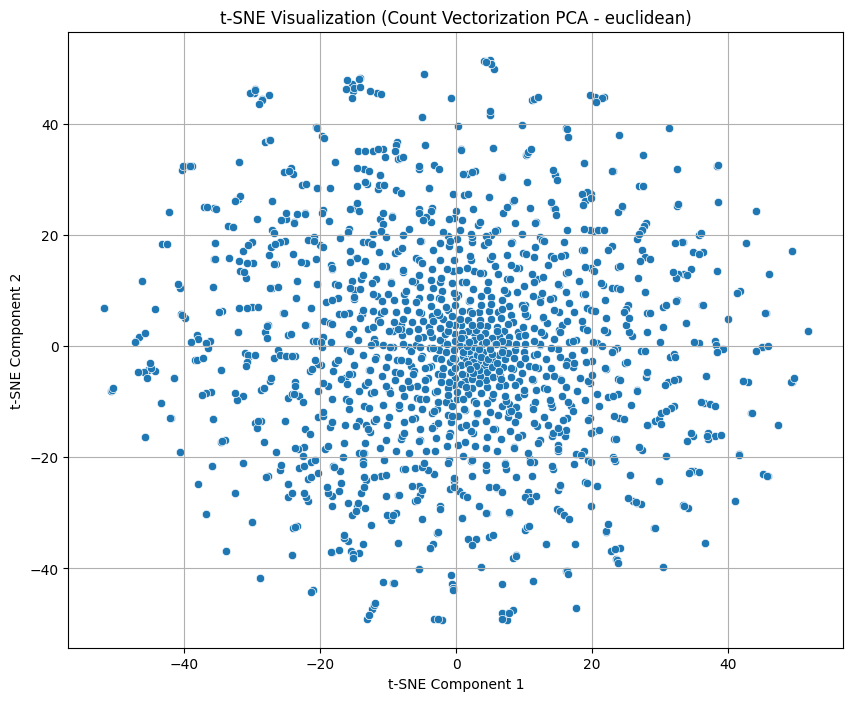

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-125-2f476845046e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")


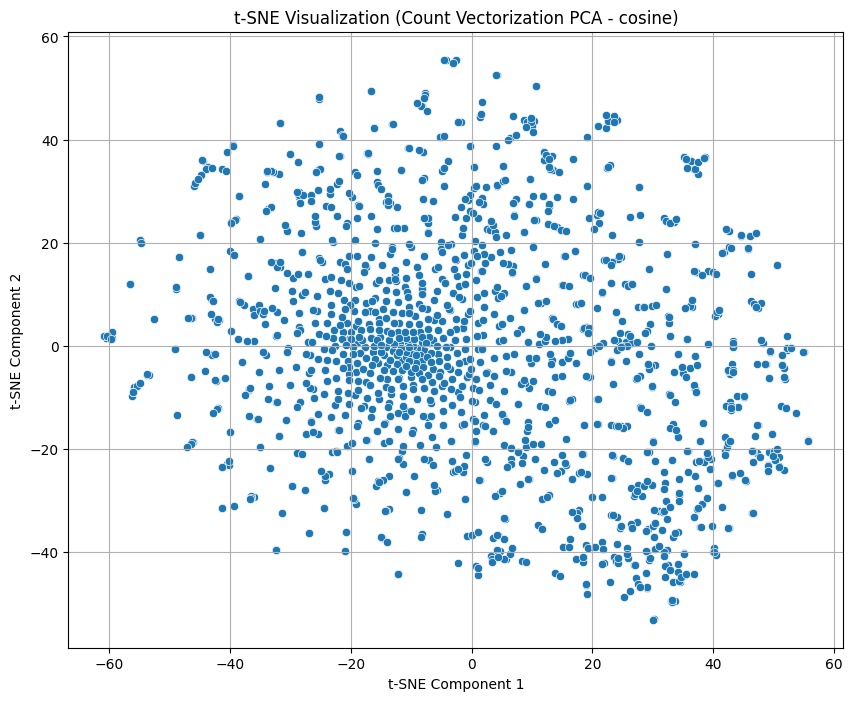

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-125-2f476845046e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")


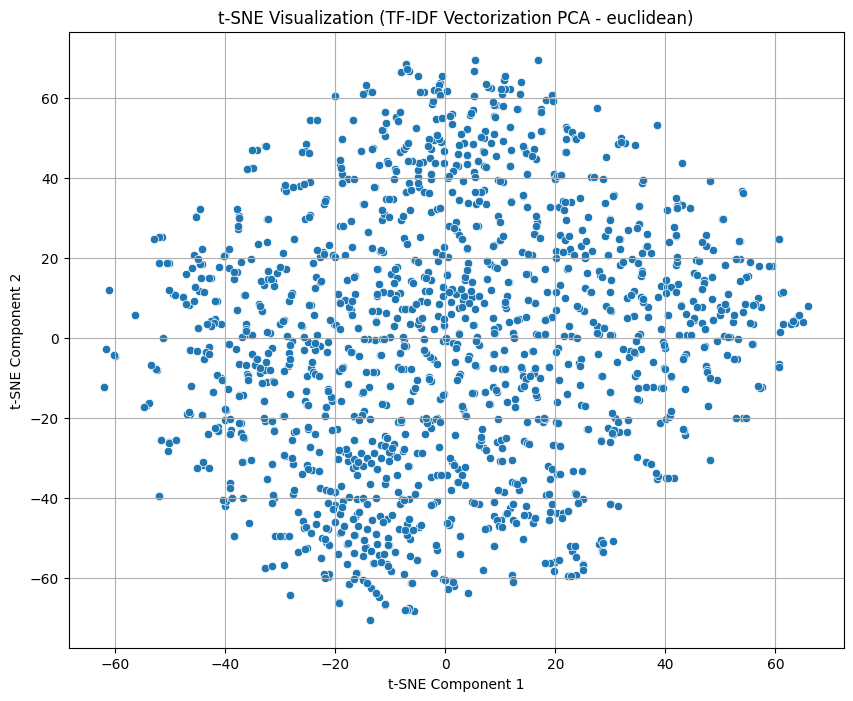

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-125-2f476845046e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")


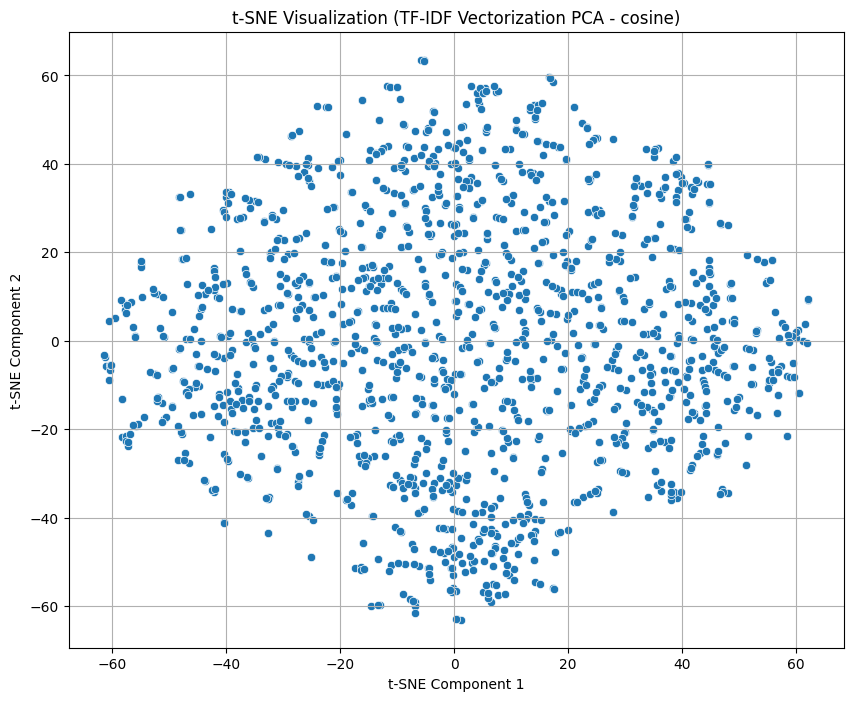

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-125-2f476845046e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")


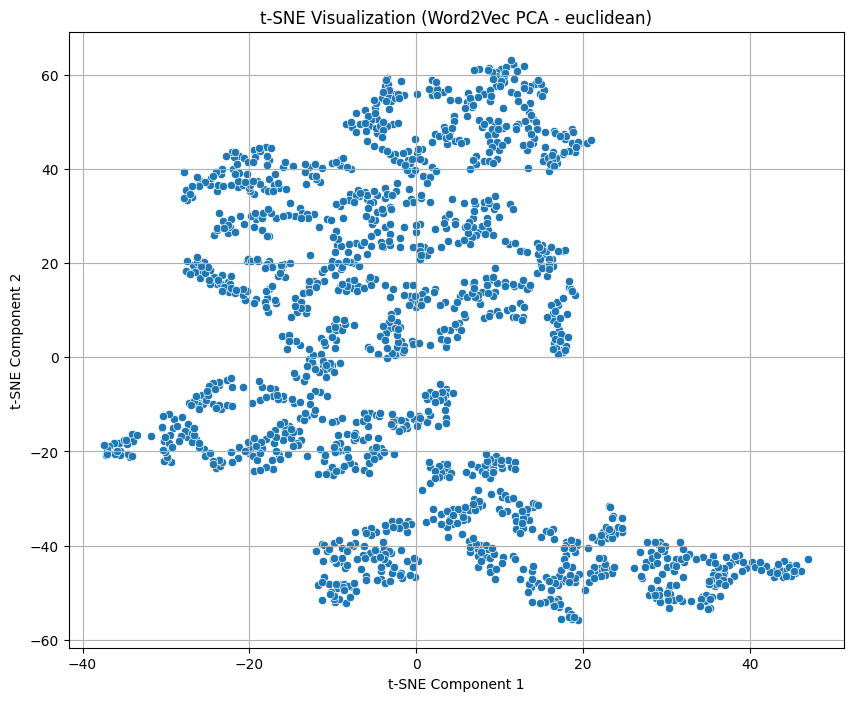

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-125-2f476845046e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")


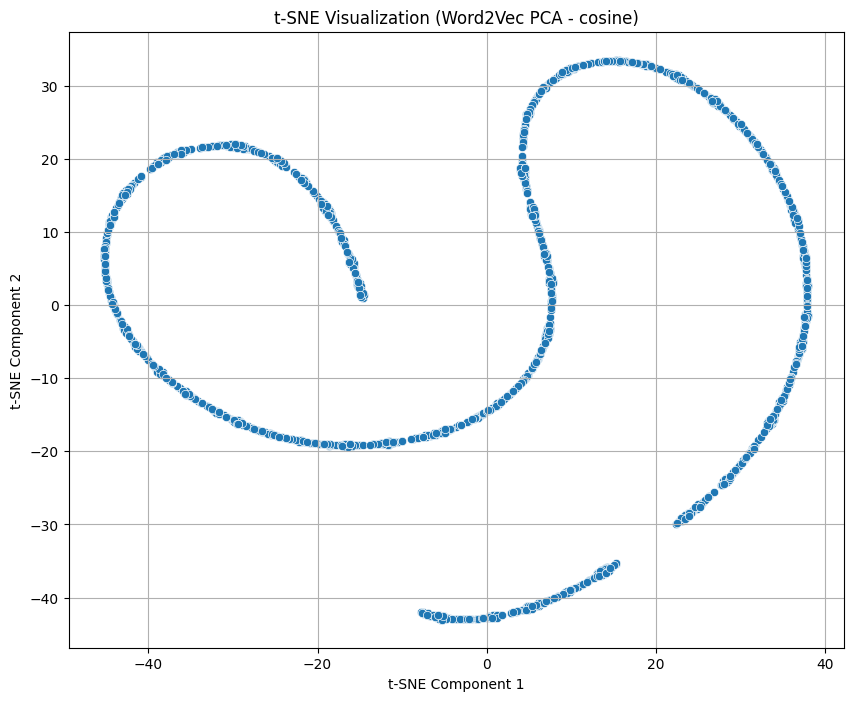

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-125-2f476845046e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")


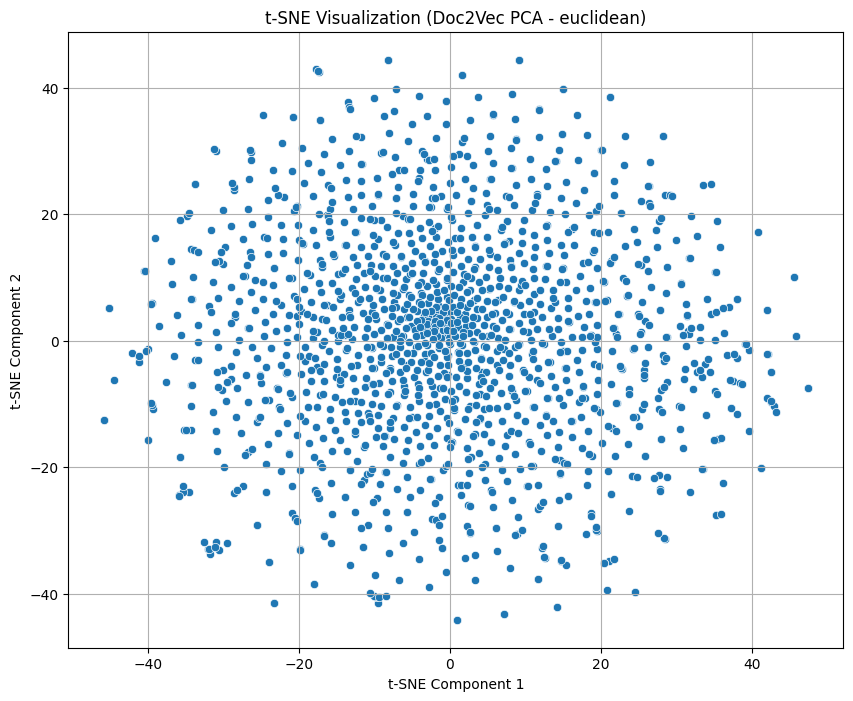

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
<ipython-input-125-2f476845046e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")


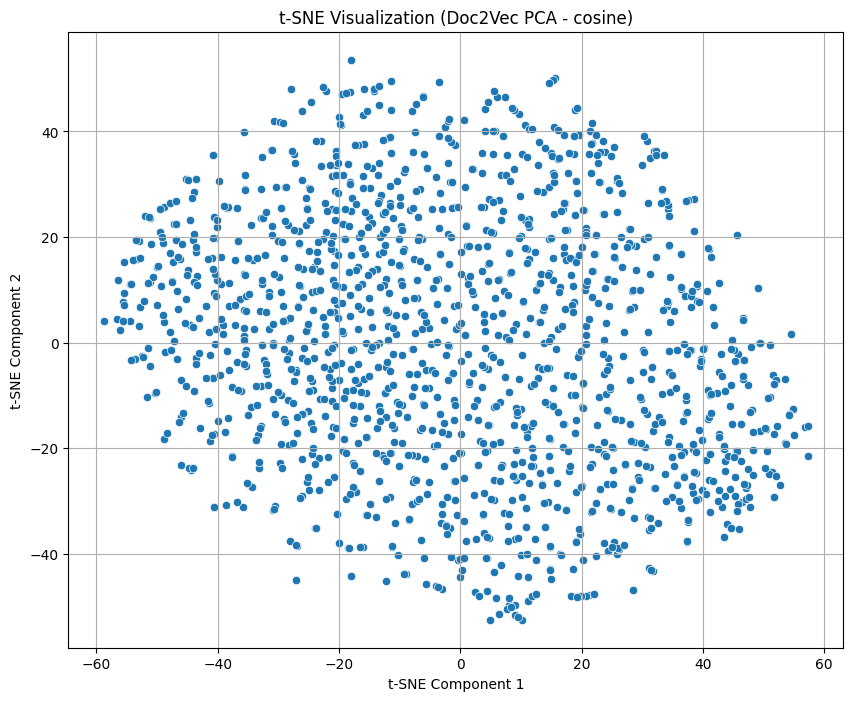

t-SNE visualizations generated.


In [125]:
# prompt: plot tsne visualization for euclidean and cosine distance for all the pca vectors

# !pip install scikit-learn matplotlib seaborn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tsne(data, title, distance_metric='euclidean'):
    """Plots t-SNE visualization for the given data."""
    tsne = TSNE(n_components=2, random_state=42, metric=distance_metric)
    tsne_results = tsne.fit_transform(data)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis")
    plt.title(f't-SNE Visualization ({title} - {distance_metric})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True)
    plt.show()

# Plot t-SNE for each PCA transformed embedding with Euclidean and Cosine distance
print("Generating t-SNE visualizations...")

# Count Vectorization PCA
plot_tsne(X_train_count_pca, "Count Vectorization PCA", distance_metric='euclidean')
plot_tsne(X_train_count_pca, "Count Vectorization PCA", distance_metric='cosine')

# TF-IDF Vectorization PCA
plot_tsne(X_train_tfidf_pca, "TF-IDF Vectorization PCA", distance_metric='euclidean')
plot_tsne(X_train_tfidf_pca, "TF-IDF Vectorization PCA", distance_metric='cosine')

# Word2Vec PCA
plot_tsne(X_train_word2vec_pca, "Word2Vec PCA", distance_metric='euclidean')
plot_tsne(X_train_word2vec_pca, "Word2Vec PCA", distance_metric='cosine')

# Doc2Vec PCA
plot_tsne(X_train_doc2vec_pca, "Doc2Vec PCA", distance_metric='euclidean')
plot_tsne(X_train_doc2vec_pca, "Doc2Vec PCA", distance_metric='cosine')

print("t-SNE visualizations generated.")

Generating distance histograms...


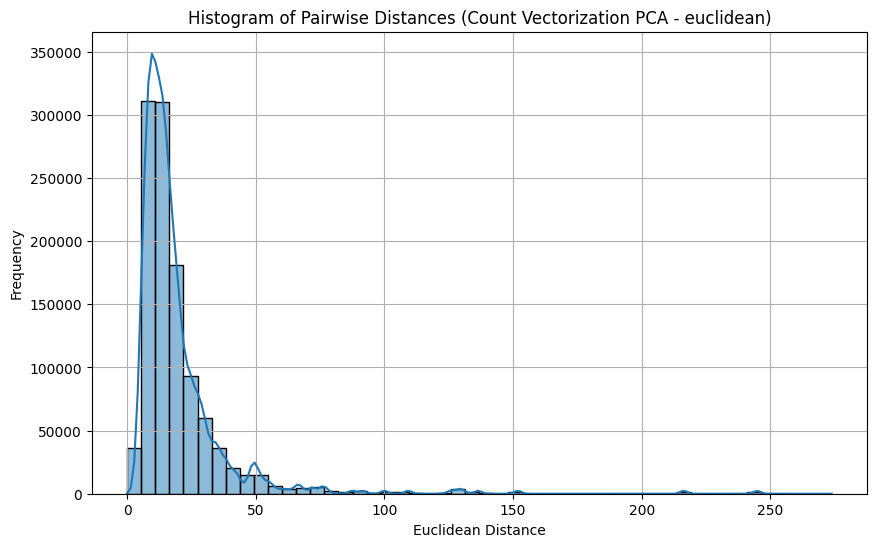

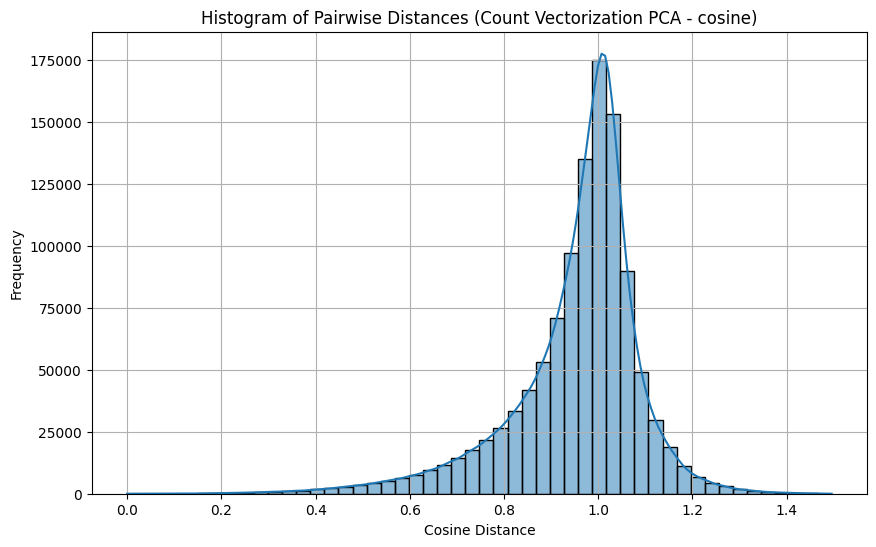

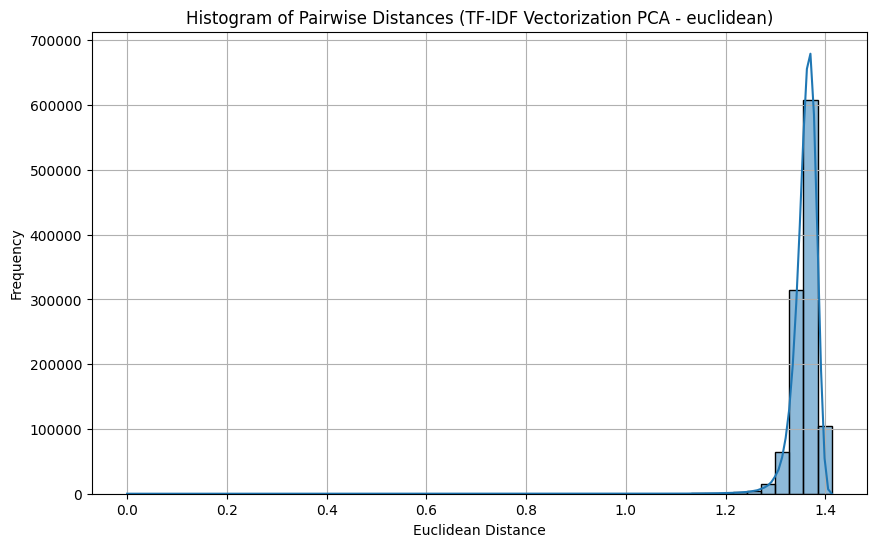

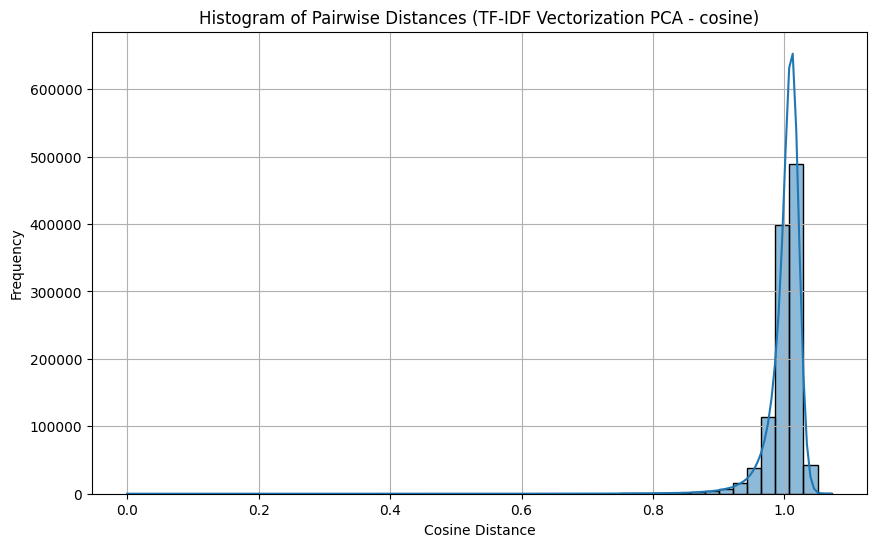

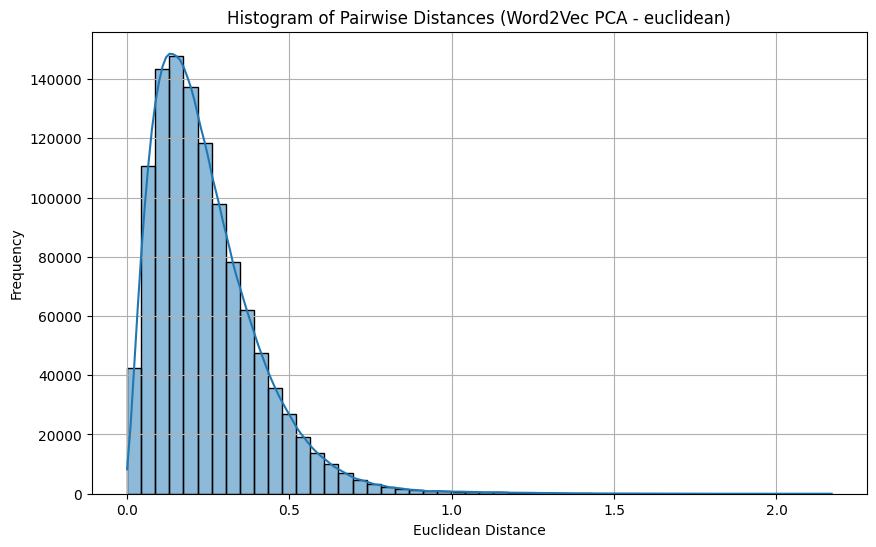

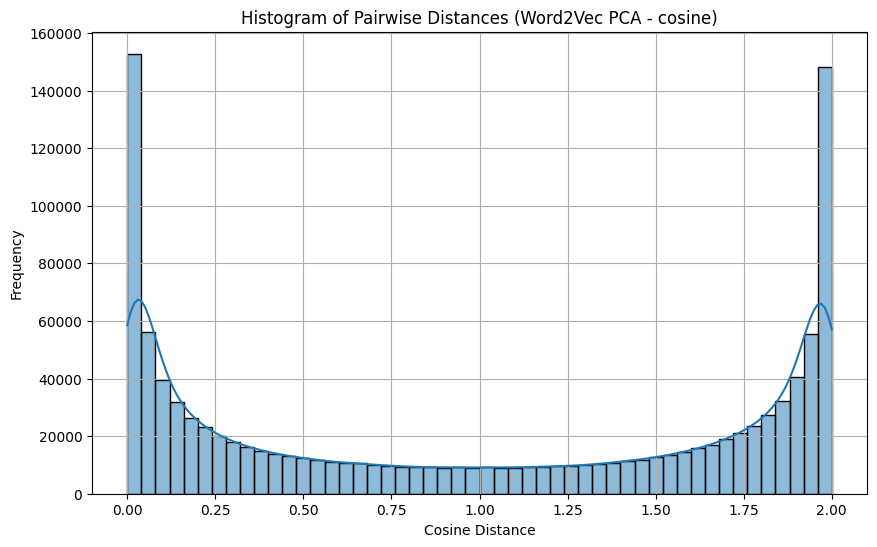

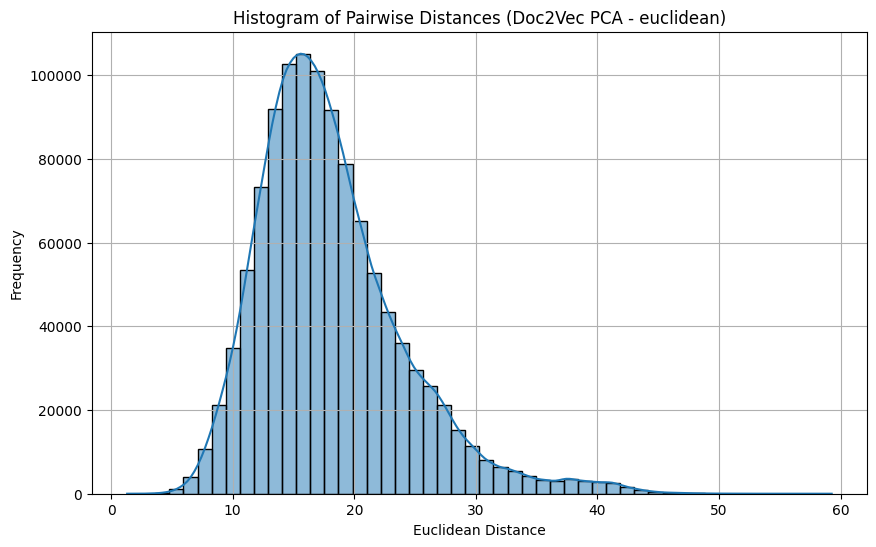

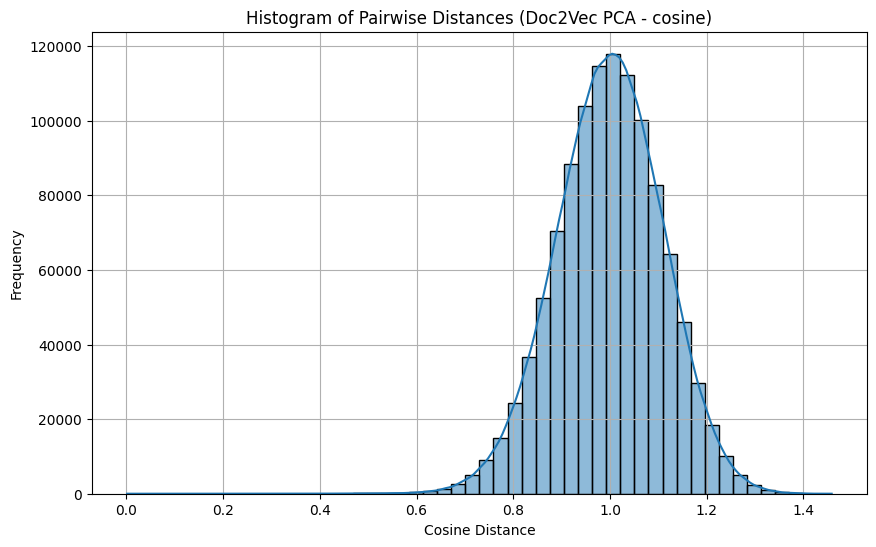

Distance histograms generated.


In [128]:
# prompt: plot histogram visualization for euclidean and cosine distance for all the pca vectors

from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distance_histogram(data, title, distance_metric='euclidean'):
    """Calculates pairwise distances and plots a histogram."""
    # Handle sparse data from CountVectorizer and TfidfVectorizer if needed,
    # although PCA output (X_train_*_pca) is already dense.
    if hasattr(data, 'toarray'):
        data = data.toarray()

    # Calculate pairwise distances
    pairwise_distances = pdist(data, metric=distance_metric)

    plt.figure(figsize=(10, 6))
    sns.histplot(pairwise_distances, bins=50, kde=True)
    plt.title(f'Histogram of Pairwise Distances ({title} - {distance_metric})')
    plt.xlabel(f'{distance_metric.capitalize()} Distance')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms of pairwise distances for each PCA transformed embedding
print("Generating distance histograms...")

# Count Vectorization PCA
plot_distance_histogram(X_train_count_pca, "Count Vectorization PCA", distance_metric='euclidean')
plot_distance_histogram(X_train_count_pca, "Count Vectorization PCA", distance_metric='cosine')

# TF-IDF Vectorization PCA
plot_distance_histogram(X_train_tfidf_pca, "TF-IDF Vectorization PCA", distance_metric='euclidean')
plot_distance_histogram(X_train_tfidf_pca, "TF-IDF Vectorization PCA", distance_metric='cosine')

# Word2Vec PCA
plot_distance_histogram(X_train_word2vec_pca, "Word2Vec PCA", distance_metric='euclidean')
plot_distance_histogram(X_train_word2vec_pca, "Word2Vec PCA", distance_metric='cosine')

# Doc2Vec PCA
plot_distance_histogram(X_train_doc2vec_pca, "Doc2Vec PCA", distance_metric='euclidean')
plot_distance_histogram(X_train_doc2vec_pca, "Doc2Vec PCA", distance_metric='cosine')

print("Distance histograms generated.")

> Since number of clusters are known, we use kmeans clustering algorithm to perform clustering on our unlabelled data.


# Apply KMeans clustering algorithm for 5 number of clusters.
> Find out silhouette score for each of the encoding method.

In [129]:
# prompt: for each of the pca vectors, apply kmeans clustering algorithm with n_clusters=5, print count of documents assigned to each cluster for all the documents along with silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import collections

# Define the PCA vectors and their names
pca_vectors = {
    "Count Vectorization PCA": X_train_count_pca,
    "TF-IDF Vectorization PCA": X_train_tfidf_pca,
    "Word2Vec PCA": X_train_word2vec_pca,
    "Doc2Vec PCA": X_train_doc2vec_pca
}

n_clusters = 5

for name, data in pca_vectors.items():
    print(f"\nApplying KMeans to {name} with n_clusters={n_clusters}")

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init
    cluster_labels = kmeans.fit_predict(data)

    # Print the count of documents assigned to each cluster
    cluster_counts = collections.Counter(cluster_labels)
    print("Document counts per cluster:")
    for cluster_id, count in sorted(cluster_counts.items()):
        print(f"  Cluster {cluster_id}: {count}")

    # Calculate and print the silhouette score
    # Check if there is more than 1 cluster and more than n_samples / 2 points in any cluster
    if len(set(cluster_labels)) > 1 and min(cluster_counts.values()) > 1:
         silhouette_avg = silhouette_score(data, cluster_labels)
         print(f"Silhouette Score: {silhouette_avg:.4f}")
    else:
        print("Cannot calculate silhouette score: Only one cluster or too few samples per cluster.")


Applying KMeans to Count Vectorization PCA with n_clusters=5
Document counts per cluster:
  Cluster 0: 12
  Cluster 1: 13
  Cluster 2: 1
  Cluster 3: 1468
  Cluster 4: 1
Cannot calculate silhouette score: Only one cluster or too few samples per cluster.

Applying KMeans to TF-IDF Vectorization PCA with n_clusters=5
Document counts per cluster:
  Cluster 0: 116
  Cluster 1: 166
  Cluster 2: 193
  Cluster 3: 235
  Cluster 4: 785
Silhouette Score: 0.0048

Applying KMeans to Word2Vec PCA with n_clusters=5
Document counts per cluster:
  Cluster 0: 141
  Cluster 1: 507
  Cluster 2: 219
  Cluster 3: 314
  Cluster 4: 314
Silhouette Score: 0.3488

Applying KMeans to Doc2Vec PCA with n_clusters=5
Document counts per cluster:
  Cluster 0: 2
  Cluster 1: 153
  Cluster 2: 977
  Cluster 3: 235
  Cluster 4: 128
Silhouette Score: 0.0833


# Use AgglomerativeClustering method similarly to compare with KMeans

In [130]:
# from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import collections

# Define the PCA vectors and their names
pca_vectors = {
    "Count Vectorization PCA": X_train_count_pca,
    "TF-IDF Vectorization PCA": X_train_tfidf_pca,
    "Word2Vec PCA": X_train_word2vec_pca,
    "Doc2Vec PCA": X_train_doc2vec_pca
}

n_clusters = 5

for name, data in pca_vectors.items():
    print(f"\nApplying AgglomerativeClustering to {name} with n_clusters={n_clusters}")

    # Apply KMeans clustering
    agg_cluster_word2vec = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean')
    cluster_labels_word2vec = agg_cluster_word2vec.fit_predict(X_train_word2vec_pca)

    # Print the count of documents assigned to each cluster
    cluster_counts = collections.Counter(cluster_labels_word2vec)
    print("Document counts per cluster:")
    for cluster_id, count in sorted(cluster_counts.items()):
        print(f"  Cluster {cluster_id}: {count}")

    # Calculate and print the silhouette score
    # Check if there is more than 1 cluster and more than n_samples / 2 points in any cluster
    if len(set(cluster_labels_word2vec)) > 1 and min(cluster_counts.values()) > 1:
         silhouette_avg = silhouette_score(data, cluster_labels_word2vec)
         print(f"Silhouette Score: {silhouette_avg:.4f}")
    else:
        print("Cannot calculate silhouette score: Only one cluster or too few samples per cluster.")


Applying AgglomerativeClustering to Count Vectorization PCA with n_clusters=5
Document counts per cluster:
  Cluster 0: 682
  Cluster 1: 337
  Cluster 2: 203
  Cluster 3: 38
  Cluster 4: 235
Silhouette Score: -0.3136

Applying AgglomerativeClustering to TF-IDF Vectorization PCA with n_clusters=5
Document counts per cluster:
  Cluster 0: 682
  Cluster 1: 337
  Cluster 2: 203
  Cluster 3: 38
  Cluster 4: 235
Silhouette Score: -0.0033

Applying AgglomerativeClustering to Word2Vec PCA with n_clusters=5
Document counts per cluster:
  Cluster 0: 682
  Cluster 1: 337
  Cluster 2: 203
  Cluster 3: 38
  Cluster 4: 235
Silhouette Score: 0.3102

Applying AgglomerativeClustering to Doc2Vec PCA with n_clusters=5
Document counts per cluster:
  Cluster 0: 682
  Cluster 1: 337
  Cluster 2: 203
  Cluster 3: 38
  Cluster 4: 235
Silhouette Score: -0.1491


# As per silhoutte score, we can see that word2Vec performs best with KMeans clustering algorithm.
> We are going to use Word2Vec embedding technique for our clustering purpose.

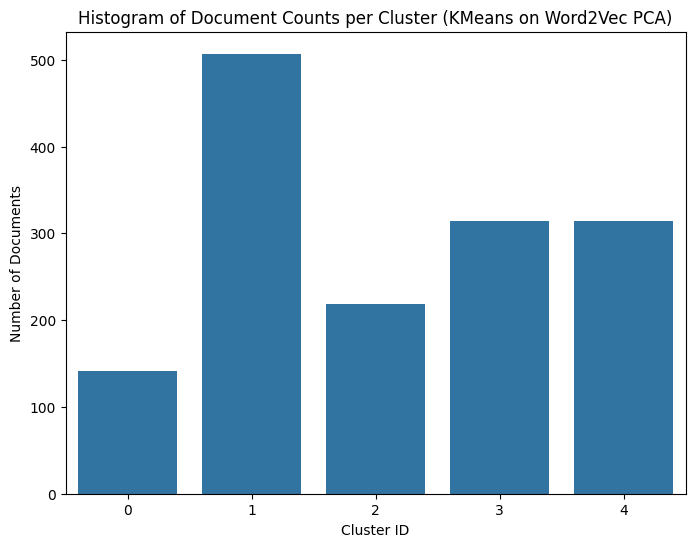

Silhouette Score for KMeans on Word2Vec PCA: 0.3488


In [131]:
# prompt: perform kmean clustering algorithm with n_clusters=5 on  X_train_word2vec_pca and plot histogram of all classes, calculate silhouette score again.

# Perform KMeans clustering on X_train_word2vec_pca
n_clusters = 5
kmeans_word2vec = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_word2vec.fit_transform(X_train_word2vec_pca)
cluster_labels_word2vec = kmeans_word2vec.predict(X_train_word2vec_pca)

# Plot histogram of cluster assignments
plt.figure(figsize=(8, 6))
sns.countplot(x=cluster_labels_word2vec)
plt.title('Histogram of Document Counts per Cluster (KMeans on Word2Vec PCA)')
plt.xlabel("Cluster ID")
plt.ylabel("Number of Documents")
plt.show()

# Calculate and print the silhouette score again
# Check if there is more than 1 cluster and more than 1 sample in each cluster
if len(set(cluster_labels_word2vec)) > 1 and len(cluster_labels_word2vec) > n_clusters:
    silhouette_avg_kmeans_word2vec = silhouette_score(X_train_word2vec_pca, cluster_labels_word2vec)
    print(f"Silhouette Score for KMeans on Word2Vec PCA: {silhouette_avg_kmeans_word2vec:.4f}")
else:
    print("Cannot calculate silhouette score: Only one cluster or too few samples per cluster.")

In [143]:
# prompt: save cluster labels, original document and the X_train_word2vec_pca in a csv file

import pandas as pd

# Create a DataFrame with cluster labels, original documents, and PCA-transformed Word2Vec data
df_results = pd.DataFrame({
    'Cleaned_document': X_train_tl,
    'Word2Vec_PCA': list(X_train_word2vec_pca), # Convert NumPy array to list for easier storage in DataFrame cell
    'Cluster_Label': cluster_labels_word2vec,
})

# Define the path to save the CSV file in Google Drive
output_path = '/content/drive/MyDrive/Colab Notebooks/clustering_results_word2vec_pca.csv'

# Save the DataFrame to a CSV file
df_results.to_csv(output_path, index=False)

print(f"Clustering results saved to {output_path}")

Clustering results saved to /content/drive/MyDrive/Colab Notebooks/clustering_results_word2vec_pca.csv


# Visualize clusters in colors

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


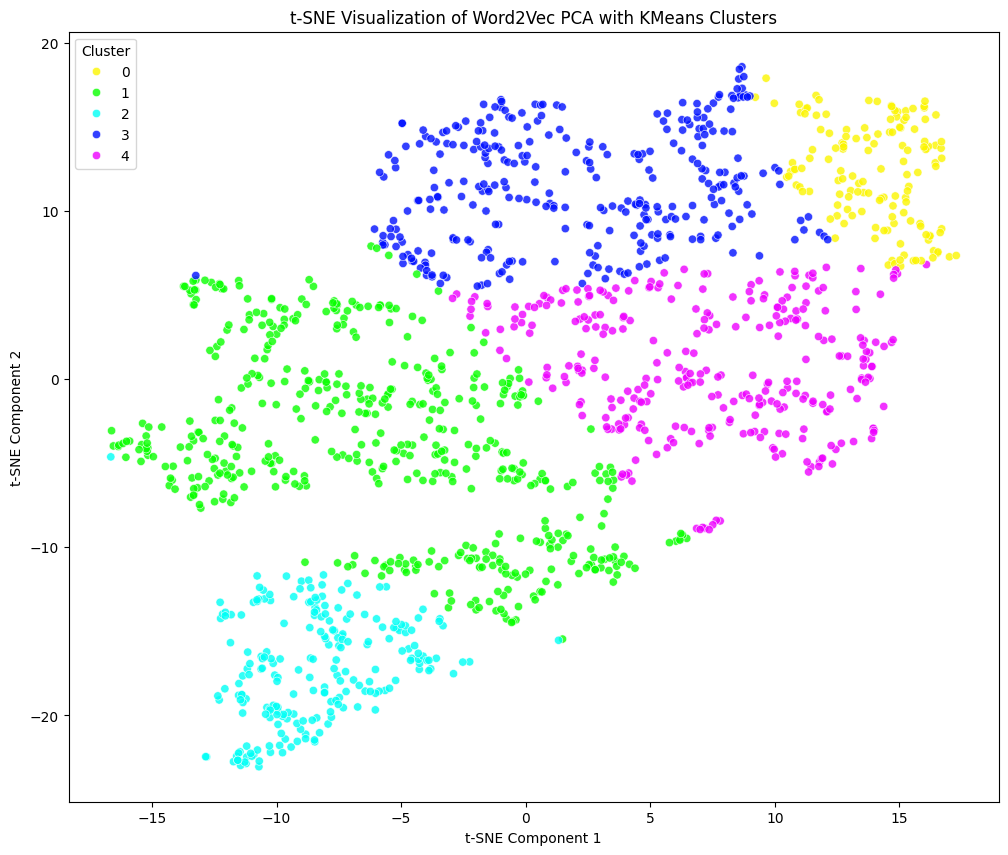

In [133]:
# prompt: visualize latent space for X_train_word2vec_pca using tsne  visualization and sns.scatterplot

import pandas as pd
# Apply t-SNE to X_train_word2vec_pca
tsne_word2vec = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300, metric='euclidean')
tsne_results_word2vec = tsne_word2vec.fit_transform(X_train_word2vec_pca)

# Create a DataFrame for easy plotting with Seaborn
tsne_df_word2vec = pd.DataFrame(data = tsne_results_word2vec, columns = ['t-SNE Component 1', 't-SNE Component 2'])
tsne_df_word2vec['Cluster'] = cluster_labels_word2vec # Add the cluster labels

# Visualize the t-SNE results colored by KMeans cluster
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="t-SNE Component 1", y="t-SNE Component 2",
    hue="Cluster",
    palette=sns.color_palette("hsv", n_clusters),
    data=tsne_df_word2vec,
    legend="full",
    alpha=0.8
)
plt.title('t-SNE Visualization of Word2Vec PCA with KMeans Clusters')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Identify most important words for each cluster

In [141]:
# prompt: identify labels for each of the 5 clusters

import pandas as pd

# Identify the most frequent words in each cluster to infer labels
print("\nMost frequent words in each cluster:")
for cluster_id in range(n_clusters):
    print(f"\nCluster {cluster_id}:")
    # Get the indices of documents in the current cluster
    cluster_indices = [i for i, label in enumerate(cluster_labels_word2vec) if label == cluster_id]
    # Get the preprocessed text for these documents
    cluster_docs = [X_train_tl[i] for i in cluster_indices]

    # Join the documents into a single string for word counting
    cluster_text = ' '.join(cluster_docs)

    # Count word frequencies
    word_counts = collections.Counter(cluster_text.split())

    # Print the top N most common words
    n_top_words = 40
    print(f"  Top {n_top_words} words: {word_counts.most_common(n_top_words)}")



Most frequent words in each cluster:

Cluster 0:
  Top 40 words: [('peopl', 165), ('think', 124), ('would', 123), ('ms', 118), ('myer', 118), ('dont', 115), ('say', 112), ('one', 112), ('work', 96), ('know', 95), ('moral', 91), ('go', 89), ('god', 87), ('job', 84), ('thing', 84), ('like', 82), ('object', 80), ('want', 74), ('ray', 73), ('make', 70), ('im', 67), ('get', 66), ('believ', 63), ('look', 61), ('see', 60), ('good', 59), ('well', 59), ('use', 59), ('christian', 59), ('presid', 58), ('someth', 57), ('need', 56), ('mean', 56), ('jesu', 55), ('question', 53), ('tri', 52), ('mani', 50), ('time', 50), ('right', 49), ('ask', 49)]

Cluster 1:
  Top 40 words: [('one', 413), ('would', 376), ('use', 355), ('space', 326), ('like', 287), ('get', 259), ('time', 242), ('go', 213), ('peopl', 209), ('new', 196), ('work', 186), ('know', 185), ('dont', 185), ('year', 184), ('system', 169), ('think', 168), ('also', 167), ('orbit', 164), ('make', 161), ('look', 157), ('even', 154), ('good', 154)

# Cluster Labels
> Identifying cluster labes looking at the top words:

Cluster no: Cluster Label

0:  Social, Religious and Community discussion

1:  General and Technical Topics

2:  Motor and vehicle discussion

3:  Technology and Software

4:  Aerospace and Aviation


# Let us read documents in each clusters

In [138]:
# prompt: Display 5 elements from each cluster along with document index

# Display 5 elements from each cluster along with document index
print("\nDisplaying 5 documents from each cluster:")
for cluster_id in range(n_clusters):
    print(f"\nCluster {cluster_id}:")
    # Get the indices of documents in the current cluster
    cluster_indices = [i for i, label in enumerate(cluster_labels_word2vec) if label == cluster_id]
    # Take up to the first 5 indices
    sample_indices = cluster_indices[:5]
    for doc_index in sample_indices:
        print(f"  Document Index {doc_index}: {X_train_cleaned[doc_index][:300]}...") # Display first 200 characters of the cleaned doc


Displaying 5 documents from each cluster:

Cluster 0:
  Document Index 10: nntppostinghost lifeaimitedu the white house office of the press secretary for immediate release april remarks by the president at summer jobs conference wyatt regency crystal city virginia am edit the president thank you very much the speech that octavius gave says more than anything i will be able...
  Document Index 38: replyto tony alicea nntppostinghost helainscwruedu in a previous article john we luther says john it not good netiquette to quote a complete article nothing personal please i also appreciate your being amused by such determined ignorance without taking anything away from your mirth i want to say tha...
  Document Index 85: a a i dont know what you as a white male did i do know what white males as a class have done a theyve invented the light bulbs the automobile the airplane printing with movable type photography computers the electric guitar anasthesia rocket powered space flight the compute

#Training multiple classifiers
> Splitting data into 80:20 ratio to test

> LR, DT, KNN, SVM, GaussianNB, RF

> Performance metrics used: Accuracy, Precision, Recall, F1 score

In [140]:
# prompt: split data into 80:20 train:test, train various classifiers like Logistic, Decision Tree, K-Nearest Neighbours, Support Vector Machine, Naive Bayes, Random Forest. and calculate their performance using accuracy, precision, recall and F1 scores

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming final_df contains your feature data and cluster_labels contains your target labels
X = X_train_word2vec_pca
y = cluster_labels_word2vec # Using the cluster labels as target for demonstration

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers to train
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    print(f"Finished training {name}")

# Print the performance results
print("\nClassifier Performance:")
for name, metrics in results.items():
    print(f"\n--- {name} ---")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")


Training Logistic Regression...
Finished training Logistic Regression
Training Decision Tree...
Finished training Decision Tree
Training K-Nearest Neighbors...
Finished training K-Nearest Neighbors
Training Support Vector Machine...
Finished training Support Vector Machine
Training Naive Bayes...
Finished training Naive Bayes
Training Random Forest...
Finished training Random Forest

Classifier Performance:

--- Logistic Regression ---
  Accuracy: 0.8261
  Precision: 0.8563
  Recall: 0.8261
  F1-Score: 0.8219

--- Decision Tree ---
  Accuracy: 0.9766
  Precision: 0.9766
  Recall: 0.9766
  F1-Score: 0.9765

--- K-Nearest Neighbors ---
  Accuracy: 0.9933
  Precision: 0.9935
  Recall: 0.9933
  F1-Score: 0.9933

--- Support Vector Machine ---
  Accuracy: 0.9967
  Precision: 0.9967
  Recall: 0.9967
  F1-Score: 0.9967

--- Naive Bayes ---
  Accuracy: 0.9732
  Precision: 0.9740
  Recall: 0.9732
  F1-Score: 0.9734

--- Random Forest ---
  Accuracy: 0.9900
  Precision: 0.9900
  Recall: 0.9900
 

All the classifiers are performing well with the training data. with more than 95 percent metric score across all the metrices.

---



# After Manually updated some of the document cluster labels, we are reading it again and training the classifiers again to see the performance

In [151]:
# prompt: read clustering_results_word2vec_pca_manual_update.csv

import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/clustering_results_word2vec_pca_manual_update.csv'
df_manual_update = pd.read_csv(file_path)

# Display the first few rows to verify
print("DataFrame loaded successfully:")
display(df_manual_update.head())

# You can now work with the DataFrame df_manual_update
# For example, access a column:
# print("\nCluster Labels from the loaded file:")
# print(df_manual_update['Cluster_Label'].value_counts())

DataFrame loaded successfully:


,Cleaned_document,Word2Vec_PCA,Cluster_Label
0,bit post begin topic space doesnt seem stop lo...,[ 0.01000971 -0.01832553],1
1,question author proclaim requir fourth command...,[-0.18342172 -0.15528241],4
2,get littl put heavi filter deep front ordinari...,[ 0.26968536 -0.01236727],2
3,nntppostinghost accessdigexnet troubl tri find...,[-0.00331877 0.03124784],1
4,understand new ga box option known differenti ...,[0.02572469 0.13362606],1


In [162]:
# prompt: use df_manual_update second and third column for x and y for RFClassifier model

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the second column as X (features) and the third column as y (target)
# Assuming the second column is at index 1 and the third is at index 2 (0-based indexing)
# Make sure the column indices are correct based on your CSV structure.
# If the second column is 'Feature1' and the third is 'Manual_Label', replace the indices with column names.

# Example using index-based selection (adjust indices if needed)
# Assuming the second column (index 1) contains numerical features and the third column (index 2) contains the labels.
# You might need to select multiple feature columns if your model uses more than one feature.
# If you have multiple feature columns, select them appropriately.
# For a Random Forest Classifier, X should be a 2D array or DataFrame.
# If your second column is just one feature, X will be 1D initially. You might need to reshape it.

# Let's assume the second column contains one numerical feature and the third column is the label.
# If the second column is text or non-numerical, you'll need to re-vectorize it.
# Given the context, it's likely the 'Word2Vec_PCA' column is one of the columns, which is a list of numbers.
# You'll need to convert this list of numbers back into a 2D array for the classifier.

# Find the index of 'Word2Vec_PCA' and the label column (assuming the third column is the manual label)
word2vec_col_index = df_manual_update.columns.get_loc('Word2Vec_PCA')

# Assuming the third column is the manual label. Adjust 'Manual_Label_Column_Name' if you know the column name.
# If the third column is unnamed or its name is not 'Manual_Label', you can use iloc to get it by index.
# Example using iloc for the third column (index 2)
manual_label_col_index = 2 # Adjust if the third column is at a different index

# Extract features (Word2Vec_PCA vectors) and labels
# The 'Word2Vec_PCA' column contains string representations of lists/arrays. We need to convert them back.
# Use ast.literal_eval to safely evaluate the string representation of the list.

X_manual = np.array([np.array(list(map(float, vec_str.strip('[]').split()))) for vec_str in df_manual_update['Word2Vec_PCA']])
y_manual = np.array(df_manual_update['Cluster_Label']) # Use iloc to get the third column by index


In [163]:
# prompt: split data into 80:20 train:test, train various classifiers like Logistic, Decision Tree, K-Nearest Neighbours, Support Vector Machine, Naive Bayes, Random Forest. and calculate their performance using accuracy, precision, recall and F1 scores

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import ast

# Use the updated data from the manually updated CSV
X = X_manual # Using the features extracted from the manually updated CSV
y = y_manual # Using the labels from the manually updated CSV

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers to train
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    print(f"Finished training {name}")

# Print the performance results
print("\nClassifier Performance on Manually Updated Data:")
for name, metrics in results.items():
    print(f"\n--- {name} ---")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")

Training Logistic Regression...
Finished training Logistic Regression
Training Decision Tree...
Finished training Decision Tree
Training K-Nearest Neighbors...
Finished training K-Nearest Neighbors
Training Support Vector Machine...
Finished training Support Vector Machine
Training Naive Bayes...
Finished training Naive Bayes
Training Random Forest...
Finished training Random Forest

Classifier Performance on Manually Updated Data:

--- Logistic Regression ---
  Accuracy: 0.7960
  Precision: 0.8273
  Recall: 0.7960
  F1-Score: 0.7868

--- Decision Tree ---
  Accuracy: 0.8930
  Precision: 0.8966
  Recall: 0.8930
  F1-Score: 0.8930

--- K-Nearest Neighbors ---
  Accuracy: 0.9331
  Precision: 0.9351
  Recall: 0.9331
  F1-Score: 0.9326

--- Support Vector Machine ---
  Accuracy: 0.9465
  Precision: 0.9490
  Recall: 0.9465
  F1-Score: 0.9454

--- Naive Bayes ---
  Accuracy: 0.9030
  Precision: 0.9118
  Recall: 0.9030
  F1-Score: 0.9023

--- Random Forest ---
  Accuracy: 0.9398
  Precision: 